# Data Visualization on Soccer Data:

In this file, I use 2022-2023 soccer statistics to perform data visualization. I begin by reading in the data. Then, I make predictions based on the data. You can find the dataset [2022-2023 Soccer Player Stats Dataset](https://www.kaggle.com/datasets/vivovinco/20222023-football-player-stats?resource=download).

The following packages are required to run the attached code:

- [Plotly](https://plotly.com/python/)

- [Plotly Express](https://plotly.com/python/plotly-express/)

- [Pandas](https://pandas.pydata.org/docs/)

- [Matplotlib.pylab](https://matplotlib.org/2.0.2/api/pyplot_api.html)

- [Numpy](https://numpy.org/doc/)

- [Datetime](https://docs.python.org/3/library/datetime.html)

- [Seaborn](https://seaborn.pydata.org/)

***
Import the necessary modules.
***

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import datetime as dt
import plotly.express as px

***
Read in the data and check its format.
***

In [64]:
soccer = pd.read_csv("/Users/pstern/Desktop/INDE-577/Datasets/soccer_stats.csv", 
                     encoding='ISO-8859-1', delimiter=';')
soccer.head(3)

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,Off,Crs,TklW,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%
0,1,Brenden Aaronson,USA,MFFW,Leeds United,Premier League,22,2000,20,19,...,0.17,2.54,0.51,0.0,0.0,0.0,4.86,0.34,1.19,22.2
1,2,Yunis Abdelhamid,MAR,DF,Reims,Ligue 1,35,1987,22,22,...,0.05,0.18,1.59,0.0,0.0,0.0,6.64,2.18,1.23,64.0
2,3,Himad Abdelli,FRA,MFFW,Angers,Ligue 1,23,1999,14,8,...,0.00,1.05,1.40,0.0,0.0,0.0,8.14,0.93,1.05,47.1


***
In order to visualize our data, I will create a line graph using Plotly Express. I am including some different predictors of goals in the plot.
***

In [74]:
data = pd.melt(soccer, id_vars=['Goals'], value_vars=['Shots', '90s', 'Age', 'Assists'])

# Fit the line we are plotting.
fig = px.line(data, x='Goals', y='value', color='variable', line_group='variable')

# Add axis titles.
fig.update_xaxes(title_text='Goals')
fig.update_yaxes(title_text='Predictor Value')

# Add a title.
fig.update_layout(title_text='Predictor vs. Goals for 2022-2023 Soccer Statistics')

# Adjust the layout.
fig.update_layout(
    legend=dict(title=None), 
    font=dict(size=12), 
    margin=dict(t=50), 
    width=800,
    height=500
)

fig.show()

***
Although it is nice to plot lots of things at once, that plot is not the most intereperetable. We can plot them relationships between the predictors and goals induvidually as well. Here, I will just show the plots for Shots and 90s for the sake of space.
***

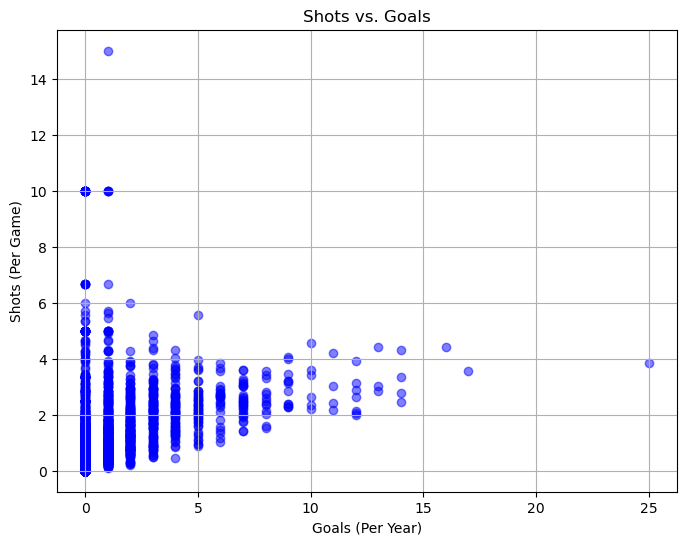

In [76]:
# Set the figure size.
plt.figure(figsize=(8, 6))

# Scatter plot for Shots vs. Goals.
plt.scatter(soccer['Goals'], soccer['Shots'], color='blue', alpha=0.5)

# Add labels and title
plt.title('Shots vs. Goals')
plt.xlabel('Goals (Per Year)')
plt.ylabel('Shots (Per Game)')

# Add a grid.
plt.grid(True)

plt.show()


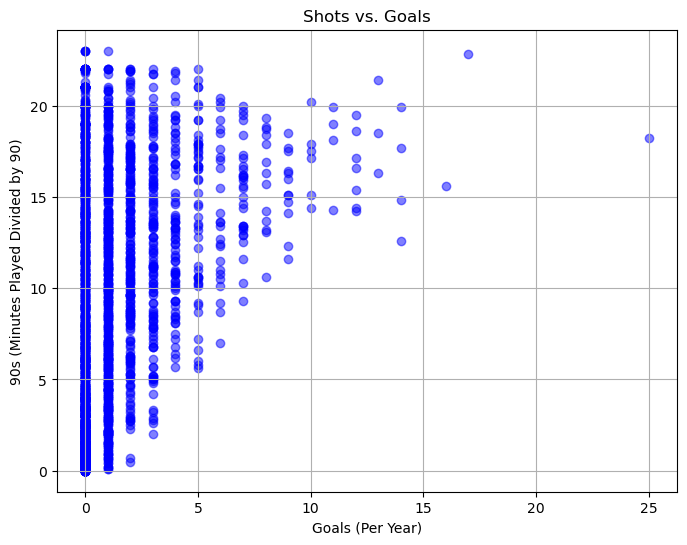

In [77]:
# Set the figure size.
plt.figure(figsize=(8, 6))

# Scatter plot for Shots vs. Goals.
plt.scatter(soccer['Goals'], soccer['90s'], color='blue', alpha=0.5)

# Add labels and title
plt.title('Shots vs. Goals')
plt.xlabel('Goals (Per Year)')
plt.ylabel('90s (Minutes Played Divided by 90)')

# Add a grid.
plt.grid(True)

plt.show()

## Training the Algorithm:

***
Get the first 250 rows of data to use as training data.
***

In [78]:
training = pd.DataFrame(data.iloc[:250]) 
testing = pd.DataFrame(data.iloc[250:])

In [ ]:
for i in range(1,8):
    training[f'lag_{i}'] = training['Close'].shift(i)
train_data = training.dropna() # drops the N/A values
train_data

# create an array for the columns with the previous days' data:
cols = [f'lag_{i}' for i in range(1,8)]

# convert the training data into numpy arrays. again, to keep the data types consistent, we use float64 for all of our variables. 
A = train_data[cols].to_numpy(dtype='float64')
y = train_data['Close'].to_numpy(dtype='float64')